In [3]:
#!pip install pdf2image pillow ipywidgets

Defaulting to user installation because normal site-packages is not writeable


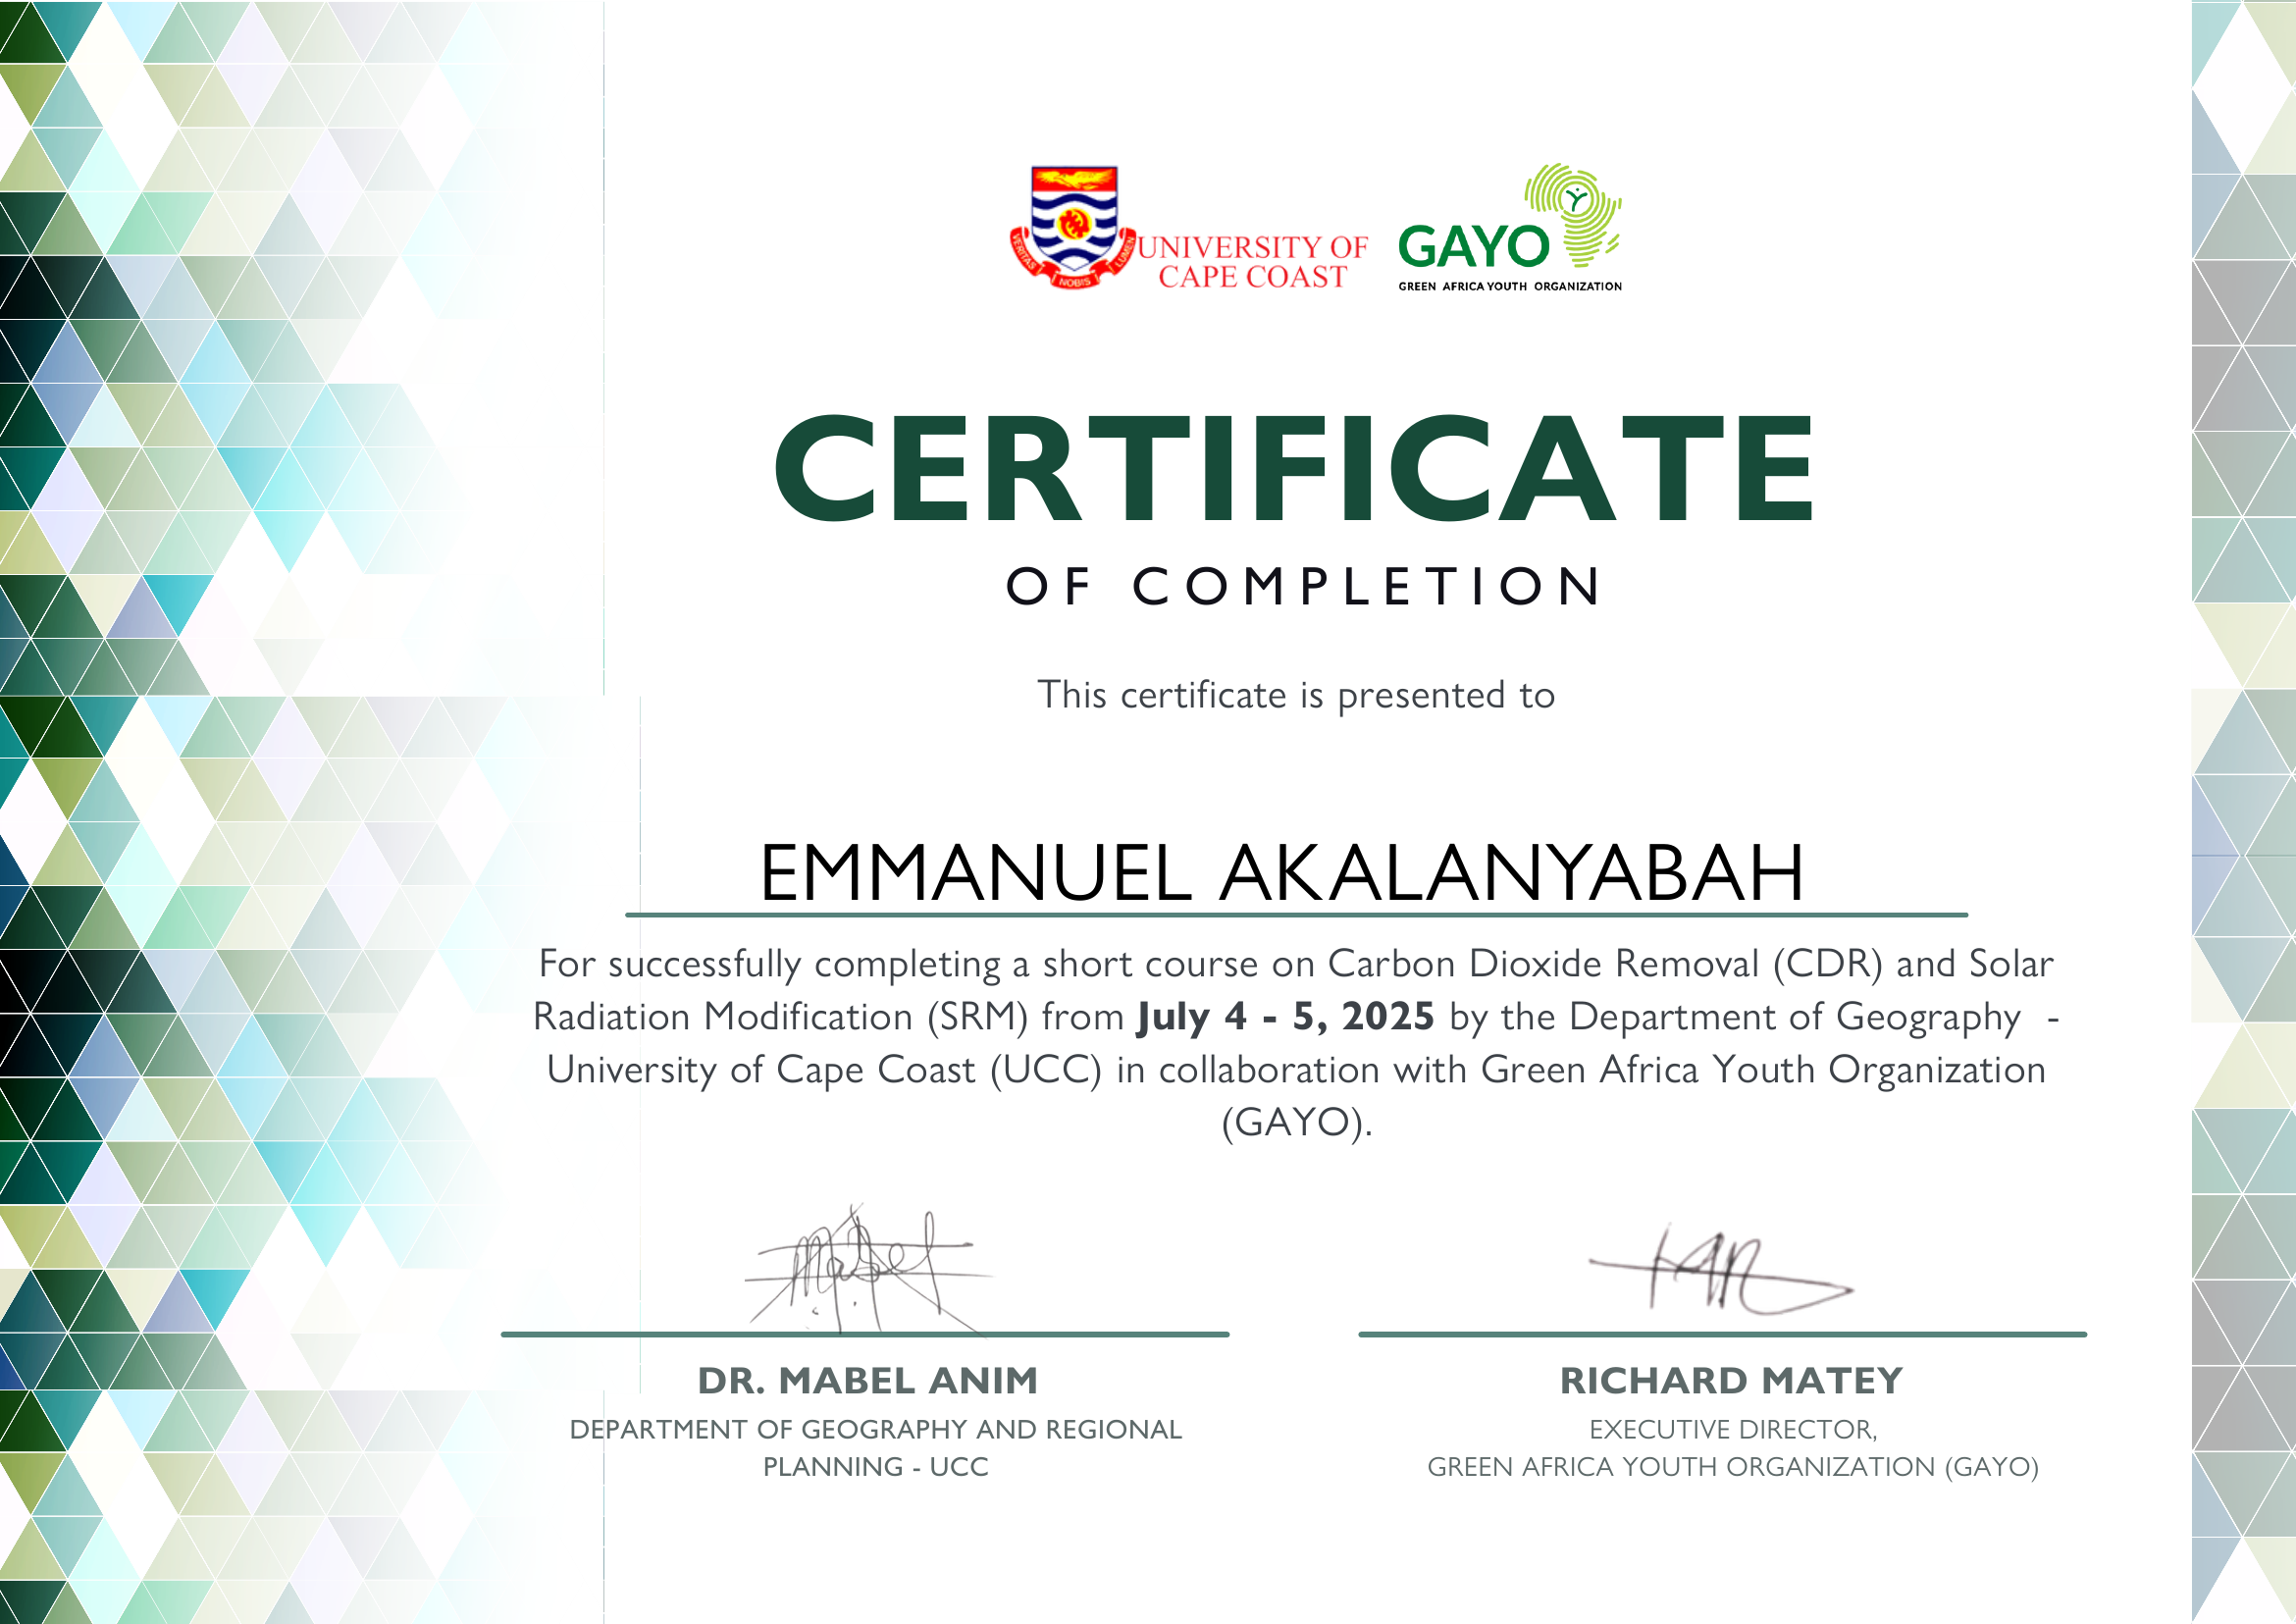

['C:\\Users\\huy\\pdf_images_output\\UCC CDRSRM Certificate EMMANUEL AKALANYABAH_page_1.png']

In [5]:
import os
from pdf2image import convert_from_path
from IPython.display import display, Image
import ipywidgets as widgets
from IPython.display import clear_output
import time

def pdf_to_images(pdf_path, output_folder=None, dpi=200, fmt='jpeg', poppler_path=None):
    """
    Convert each page of a PDF to separate image files with Jupyter progress display.
    
    Args:
        pdf_path (str): Path to the input PDF file
        output_folder (str): Folder to save output images
        dpi (int): Image quality in DPI (default: 200)
        fmt (str): Output image format ('jpeg', 'png', 'tiff') (default: 'jpeg')
        poppler_path (str): Custom path to Poppler binaries (for Windows users)
    
    Returns:
        list: Paths to the generated image files
    """
    # Validate output format
    fmt = fmt.lower()
    if fmt not in ['jpeg', 'png', 'tiff']:
        raise ValueError("Format must be 'jpeg', 'png', or 'tiff'")
    
    # Set default output folder if not specified
    if output_folder is None:
        output_folder = os.path.join(os.getcwd(), "pdf_images_output")
    
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Get PDF file name without extension
    pdf_name = os.path.splitext(os.path.basename(pdf_path))[0]
    
    # Create progress widgets
    progress = widgets.FloatProgress(value=0, min=0, max=100, description='Converting:')
    status = widgets.Label(value="Preparing conversion...")
    display(widgets.VBox([status, progress]))
    
    try:
        # Convert PDF to images with progress callback
        images = convert_from_path(
            pdf_path,
            dpi=dpi,
            poppler_path=poppler_path,
            thread_count=4,
            output_folder=output_folder
        )
        
        # Save each page as an image
        output_paths = []
        total_pages = len(images)
        
        for i, image in enumerate(images):
            # Update progress
            progress.value = (i + 1) / total_pages * 100
            status.value = f"Processing page {i+1}/{total_pages}"
            
            # Save image
            output_filename = f"{pdf_name}_page_{i+1}.{fmt}"
            output_path = os.path.join(output_folder, output_filename)
            image.save(output_path, fmt.upper())
            output_paths.append(output_path)
            
            # Display first page preview
            if i == 0:
                status.value += " | Showing first page preview..."
                display(Image(filename=output_path, width=400))
            
            # Small delay to see progress
            time.sleep(0.1)
        
        status.value = f"✅ Conversion complete! {total_pages} pages saved to: {output_folder}"
        return output_paths
        
    except Exception as e:
        status.value = f"❌ Error: {str(e)}"
        raise e

# Configuration section - SET THESE VALUES BEFORE RUNNING
PDF_PATH = r"C:\Users\huy\Desktop\UCC CDRSRM Certificate EMMANUEL AKALANYABAH.pdf"  # Update with your PDF path
POPPLER_PATH = r"C:\Users\huy\Desktop\poppler-24.08.0\Library\bin"  # For Windows users (if not in PATH)
# POPPLER_PATH = None  # For Linux/Mac users

# Run the conversion
pdf_to_images(
    pdf_path=PDF_PATH,
    output_folder=None,  # Auto-create in current directory
    dpi=200,            # Increase for higher quality
    fmt='png',          # 'jpeg', 'png', or 'tiff'
    poppler_path=POPPLER_PATH
)